# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.9258, 'lon': 18.4232},
 'dt': 1658933957,
 'id': 3369157,
 'main': {'feels_like': 16.73,
          'humidity': 65,
          'pressure': 1018,
          'temp': 17.25,
          'temp_max': 19.23,
          'temp_min': 16.6},
 'name': 'Cape Town',
 'sys': {'country': 'ZA',
         'id': 2073005,
         'sunrise': 1658900558,
         'sunset': 1658937765,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 6.69}}


In [5]:
found_cities = []
temps = []
lats = []
lons = []
hums = []
clouds = []
wnd_speed = []
country = []
date = []
count = 0
notFound = 0

# test_cities = [cities[0],cities[1],cities[2],cities[3],cities[4],cities[5]]

print("Beginning Data Retrieval...")
print("------------------------------")

for city in cities:

    try:

        response = requests.get(query_url + city).json()
        temps.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        wnd_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)

        print(f"Processing record {count} | {city}")
        count = count + 1
        
    except:
        print(f"{city} not found. Skipping...")
        notFound = notFound + 1
            
print(f"{notFound} cities were not found...")

Beginning Data Retrieval...
------------------------------
Processing record 0 | longyearbyen
illoqqortoormiut not found. Skipping...
Processing record 1 | borogontsy
Processing record 2 | mokhsogollokh
Processing record 3 | sabzevar
Processing record 4 | grand gaube
Processing record 5 | kerman
Processing record 6 | hithadhoo
Processing record 7 | asau
Processing record 8 | luderitz
Processing record 9 | east london
Processing record 10 | mataura
Processing record 11 | bluff
Processing record 12 | punta arenas
Processing record 13 | victoria
Processing record 14 | yar-sale
Processing record 15 | axim
Processing record 16 | carnarvon
Processing record 17 | kedrovka
Processing record 18 | kruisfontein
Processing record 19 | aklavik
Processing record 20 | albany
belushya guba not found. Skipping...
Processing record 21 | baena
Processing record 22 | hasaki
Processing record 23 | cidreira
Processing record 24 | port macquarie
Processing record 25 | ahipara
Processing record 26 | rikitea
P

Processing record 222 | parkes
Processing record 223 | krasnoselkup
Processing record 224 | dubovskoye
Processing record 225 | rostovka
Processing record 226 | coromandel
Processing record 227 | kodiak
Processing record 228 | pampas
Processing record 229 | clyde river
Processing record 230 | alugan
Processing record 231 | barcelona
sentyabrskiy not found. Skipping...
Processing record 232 | santa marta
Processing record 233 | anadyr
Processing record 234 | siyabuswa
huitzuco not found. Skipping...
Processing record 235 | boyolangu
Processing record 236 | ilulissat
Processing record 237 | nelson bay
Processing record 238 | waingapu
Processing record 239 | masyaf
Processing record 240 | great falls
Processing record 241 | saint-francois
Processing record 242 | balad
Processing record 243 | vaini
Processing record 244 | atuona
Processing record 245 | westport
Processing record 246 | bayan
Processing record 247 | parli
Processing record 248 | humaita
Processing record 249 | oruro
Processin

Processing record 454 | karaidel
Processing record 455 | imbituba
Processing record 456 | flin flon
Processing record 457 | milkovo
Processing record 458 | burgos
Processing record 459 | bowen
Processing record 460 | wanning
Processing record 461 | la ronge
Processing record 462 | obo
Processing record 463 | miles city
Processing record 464 | nur
Processing record 465 | joigny
Processing record 466 | piedra gorda
Processing record 467 | almaznyy
Processing record 468 | kaeo
Processing record 469 | haines junction
Processing record 470 | stokke
Processing record 471 | palmares do sul
Processing record 472 | impfondo
Processing record 473 | kaltenkirchen
Processing record 474 | yuanping
saleaula not found. Skipping...
Processing record 475 | hun
Processing record 476 | easton
Processing record 477 | miedzychod
Processing record 478 | port dickson
Processing record 479 | port-gentil
Processing record 480 | tignere
Processing record 481 | tawang
Processing record 482 | esfahan
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(f"Cities :  {len(found_cities)}")
print(f"Lat : {len(lats)}")
print(f"Lon : {len(lons)}")
print(f"Max Temp : {len(temps)}")
print(f"Humidity : {len(hums)}")
print(f"Wind Speed : {len(wnd_speed)}")
print(f"Cloudiness : {len(clouds)}")
print(f"Country : {len(country)}")
print(f"Date : {len(date)}")            

Cities :  576
Lat : 576
Lon : 576
Max Temp : 576
Humidity : 576
Wind Speed : 576
Cloudiness : 576
Country : 576
Date : 576


In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": found_cities,
    "Lat": lats,
    "Lng": lons,
    "Max Temp": temps,
    "Humidity": hums,
    "Cloudiness": clouds,
    "Wind Speed": wnd_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,10.91,71,75,6.17,SJ,1658933958
1,borogontsy,62.6683,131.1683,19.99,71,22,1.28,RU,1658933958
2,mokhsogollokh,61.4681,128.9203,18.21,71,7,0.54,RU,1658933959
3,sabzevar,36.2126,57.6819,37.60,17,0,7.20,IR,1658933959
4,grand gaube,-20.0064,57.6608,22.22,76,3,2.68,MU,1658933959
...,...,...,...,...,...,...,...,...,...
571,charagua,-19.8000,-63.2167,28.09,42,6,6.56,BO,1658934201
572,pangody,65.8500,74.4859,12.95,63,41,3.56,RU,1658934202
573,warren,39.4334,-84.1666,22.62,85,100,5.14,US,1658934202
574,baruun-urt,46.6806,113.2792,13.70,72,26,4.49,MN,1658934202


In [8]:
# export DataFrame to CSV file
weather_data.to_csv("../output/weather.csv")

In [9]:
num_data = weather_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed','Date']]
agg_df = num_data.agg(['count','mean','std','min','max'])
quantiles_df = num_data.quantile([.25,.5,.75])
agg_df = pd.concat([agg_df, quantiles_df], axis=0)
agg_df = agg_df.rename(index={
    0.25: '25%',
    0.5: '50%',
    0.75: '75%',  
                    })
agg_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.324495,21.498365,21.850955,68.586806,56.548611,3.485174,1.658934e+09
std,33.446256,87.893244,8.080189,23.032365,38.641870,2.298156,9.490334e+01
min,-54.800000,-175.200000,0.570000,5.000000,0.000000,0.000000,1.658934e+09
max,78.218600,179.316700,44.540000,100.000000,100.000000,14.220000,1.658934e+09
25%,-9.283325,-53.706850,16.532500,58.000000,14.000000,1.710000,1.658934e+09
50%,22.244000,25.710050,23.010000,74.000000,65.000000,2.980000,1.658934e+09
75%,47.988575,100.271350,27.192500,86.000000,97.000000,4.945000,1.658934e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
sorted_cities = weather_data[weather_data['Humidity'] <= 100]
sorted_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,10.91,71,75,6.17,SJ,1658933958
1,borogontsy,62.6683,131.1683,19.99,71,22,1.28,RU,1658933958
2,mokhsogollokh,61.4681,128.9203,18.21,71,7,0.54,RU,1658933959
3,sabzevar,36.2126,57.6819,37.60,17,0,7.20,IR,1658933959
4,grand gaube,-20.0064,57.6608,22.22,76,3,2.68,MU,1658933959


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

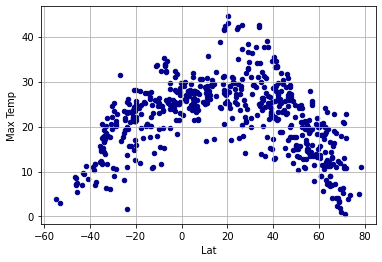

In [12]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
ax1.grid()
plt.savefig('../output/latVsTemp.png')

## Latitude vs. Humidity Plot

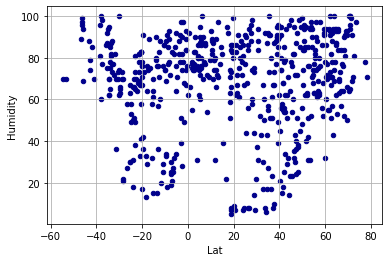

In [13]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
ax1.grid()
plt.savefig('../output/latVsHum.png')

## Latitude vs. Cloudiness Plot

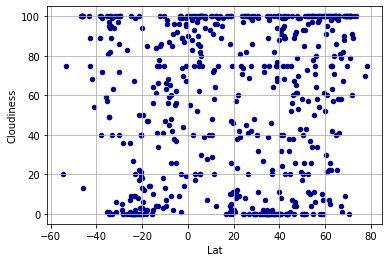

In [14]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
ax1.grid()
plt.savefig('../output/latVsCloud.png')

## Latitude vs. Wind Speed Plot

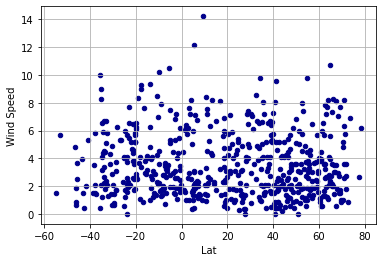

In [15]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
ax1.grid()
plt.savefig('../output/latVsWind.png')

## Linear Regression

In [16]:
# This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude):
north_cities = sorted_cities[sorted_cities['Lat'] >= 0]
south_cities = sorted_cities[sorted_cities['Lat'] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6475915403303163


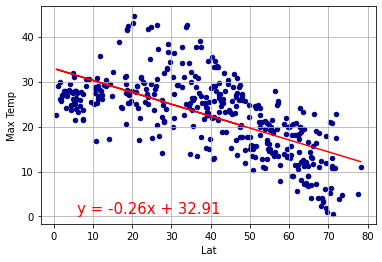

In [17]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()

ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('../output/NorthlatVsMaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7210834644171086


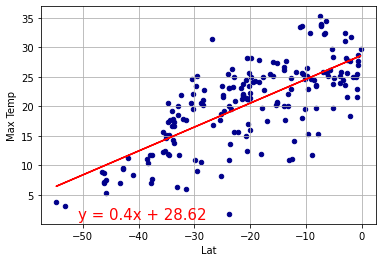

In [18]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
ax1.annotate(line_eq,(-50.8,0.8),fontsize=15,color="red")
plt.savefig('../output/SouthlatVsMaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06387490526307163


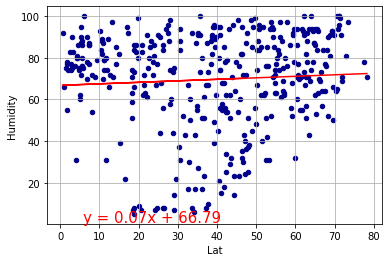

In [19]:

ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Humidity'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('../output/NorthlatVsHum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.19513844427915186


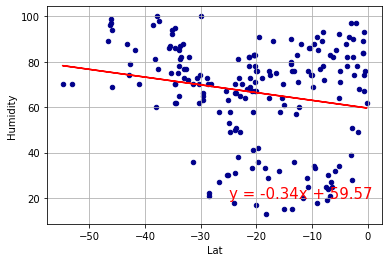

In [20]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Humidity'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.savefig('../output/SouthlatVsHum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06272368794307968


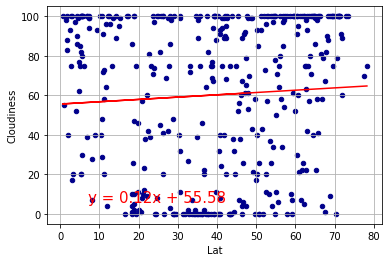

In [21]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Cloudiness'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(7,5.8),fontsize=15,color="red")
plt.savefig('../output/NorthlatVsCloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04287022371624723


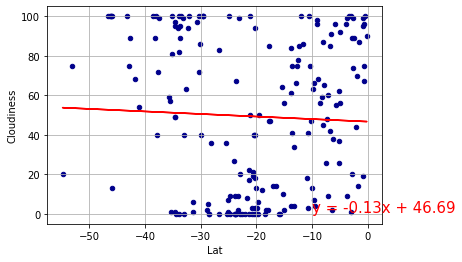

In [22]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Cloudiness'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-10,0.8),fontsize=15,color="red")
plt.savefig('../output/SouthlatVsCloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.030296106246650377


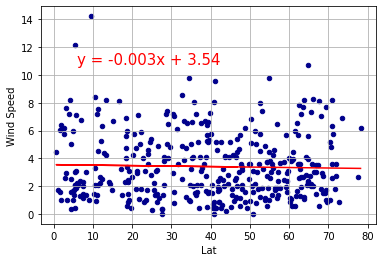

In [23]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Wind Speed'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(5.8,10.8),fontsize=15,color="red")
plt.savefig('../output/NorthlatVsWind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.045964635583816006


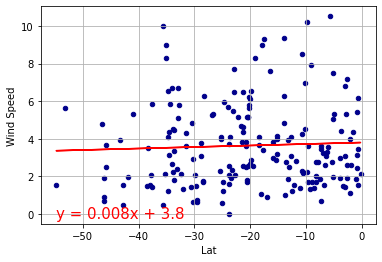

In [24]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Wind Speed'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-54.8,-0.2),fontsize=15,color="red")
plt.savefig('../output/SouthlatVsWind.png')